In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Zoo_Data=pd.read_csv("Zoo.csv")
Zoo_Data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
Zoo_Data=Zoo_Data.rename({'animal name':'animal_name'},axis=1)
Zoo_Data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo_data=Zoo_Data.drop('animal_name',axis=1)
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


<AxesSubplot:xlabel='type'>

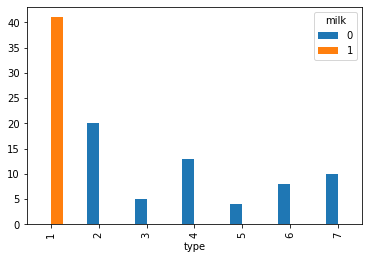

In [7]:
pd.crosstab(zoo_data.type,zoo_data.milk).plot(kind='bar')

<AxesSubplot:xlabel='domestic'>

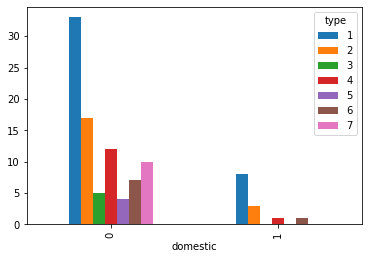

In [8]:
pd.crosstab(zoo_data.domestic,zoo_data.type).plot(kind='bar')

<AxesSubplot:xlabel='venomous'>

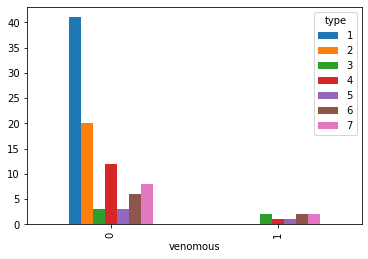

In [9]:
pd.crosstab(zoo_data.venomous,zoo_data.type).plot(kind='bar')

<AxesSubplot:xlabel='hair'>

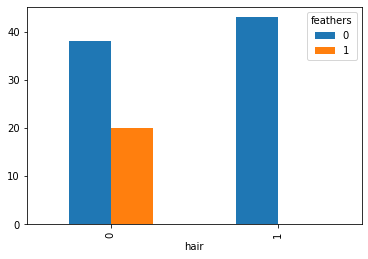

In [10]:
pd.crosstab(zoo_data.hair,zoo_data.feathers).plot(kind='bar')

<AxesSubplot:>

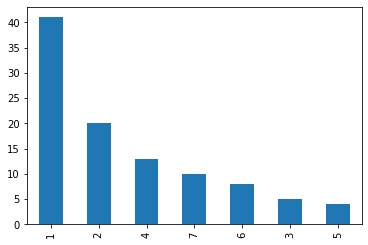

In [11]:
zoo_data['type'].value_counts().plot(kind='bar')

In [12]:
x=zoo_data.iloc[:,0:16]
y=zoo_data.iloc[:,16]

In [13]:
kfold = KFold(n_splits=10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [14]:
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, x, y, cv=kfold)
results

array([1. , 0.9, 1. , 1. , 1. , 1. , 1. , 0.7, 0.9, 0.9])

In [15]:
print(results.mean())

0.9400000000000001


# Grid Search for Algorithm Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
n_neighbors = np.array([2*i+1 for i in range(1,15)])
param_grid = dict(n_neighbors=n_neighbors)

In [54]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid,cv=10)
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])})

In [55]:
print(grid.best_score_)
print(grid.best_params_ )

0.95
{'n_neighbors': 3}


# Visualizing the CV results

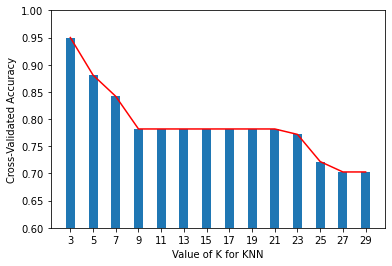

In [56]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = [2*i+1 for i in range(1,15)]
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())

plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

In [57]:
k_scores

[0.95,
 0.8809090909090909,
 0.8418181818181818,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7718181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726]